In [1]:
%matplotlib inline

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

/Users/online1/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#data load
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
#data preprocessing
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

In [4]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

In [5]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',  # 'mean_squared_error'
              metrics=['accuracy', 'mean_squared_error'])

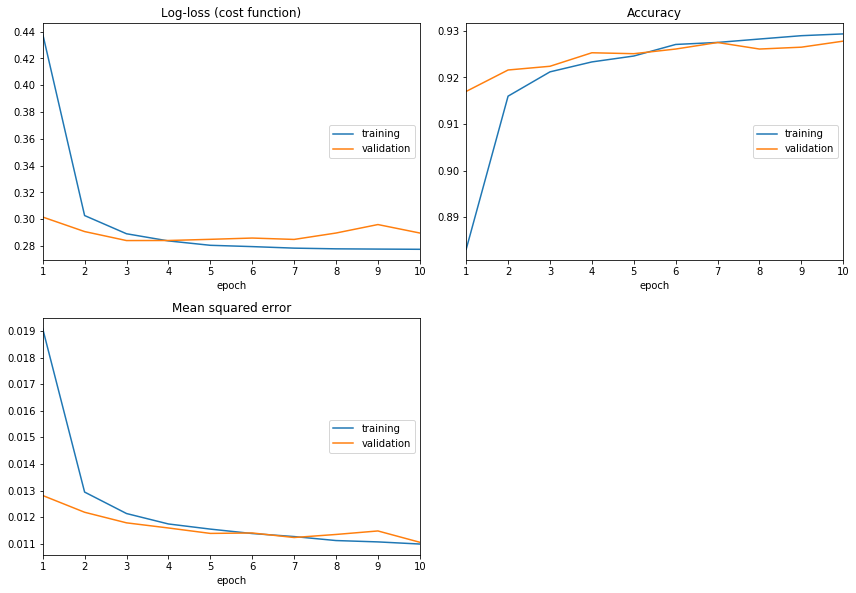

In [6]:
history  = model.fit(X_train, Y_train,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[plot_losses],
          verbose=0)

In [19]:
history_dict = history.history
print(history_dict)

{'val_loss': [0.29691243604943157, 0.29991461948156356, 0.2976360583923757, 0.302152624913305, 0.30531218599155546, 0.3033675872348249, 0.30716564358621834, 0.31401956898868083, 0.3088476520597935, 0.31117494478970764], 'val_acc': [0.9268, 0.9263, 0.9284, 0.9263, 0.9262, 0.9285, 0.9266, 0.9265, 0.9289, 0.9283], 'val_mean_squared_error': [0.0113681031913482, 0.01131539227629255, 0.01113470659161103, 0.011320771136110125, 0.01146001431693294, 0.011181727075279924, 0.011360659508987738, 0.01155393723253801, 0.011255671450328374, 0.011309997783361177], 'loss': [0.27782075423200925, 0.27809257022539774, 0.2786117283930381, 0.2782613185882568, 0.27927642631729444, 0.2799100254704555, 0.2797333119099339, 0.28013248390580214, 0.2805287078107397, 0.2807700004627307], 'acc': [0.9294166666666667, 0.9294666666666667, 0.93015, 0.9306333333333333, 0.931, 0.9306, 0.9310166666666667, 0.9311166666666667, 0.9313833333333333, 0.9316833333333333], 'mean_squared_error': [0.01095221146409555, 0.010926316032

In [20]:
print(history_dict['val_loss'])

[0.29691243604943157, 0.29991461948156356, 0.2976360583923757, 0.302152624913305, 0.30531218599155546, 0.3033675872348249, 0.30716564358621834, 0.31401956898868083, 0.3088476520597935, 0.31117494478970764]


In [21]:
print(history_dict['val_acc'])

[0.9268, 0.9263, 0.9284, 0.9263, 0.9262, 0.9285, 0.9266, 0.9265, 0.9289, 0.9283]


In [ ]:
model.save(mnist_live_loss.pb)